# 1) Import Modules

In [2]:
# ASTR 400B Project

# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

# 2) Function to plot Local Group at given set of snapshots (centered on MW)

[777.89039863 771.60904509 768.27298104 ... 767.44045494 770.39546404
 764.52366784]
[787.26507392 763.62511376 760.4038578  ... 787.32160889 771.89284569
 760.91470569]


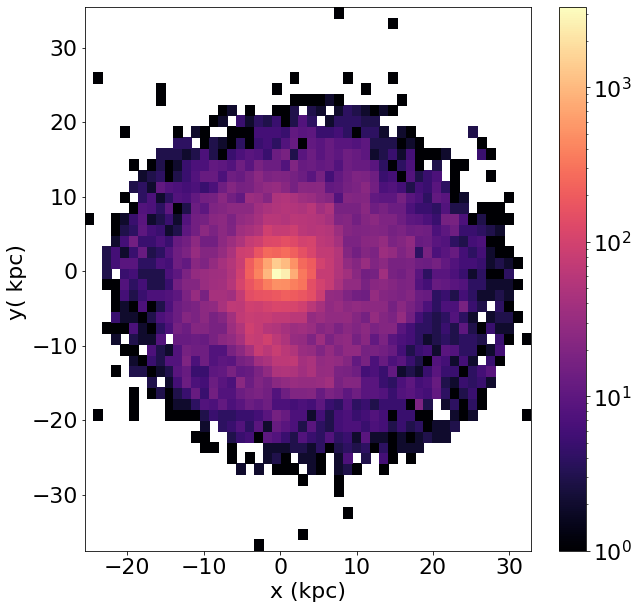

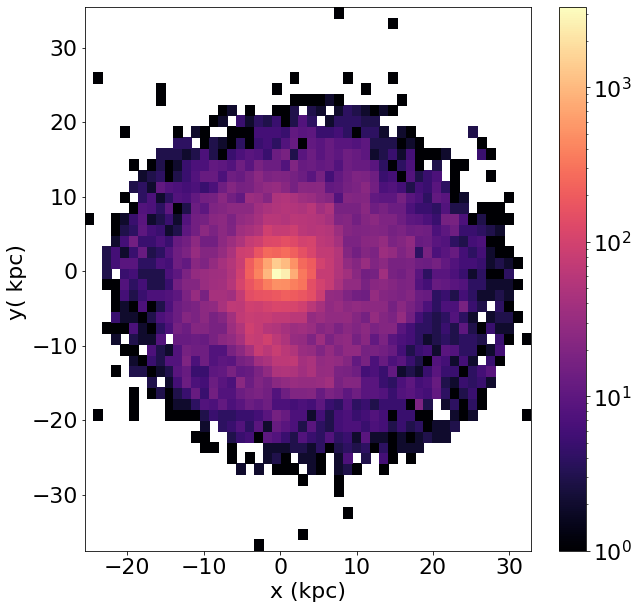

In [39]:
# Define range of snapshots to use
snap_ids = np.arange(0,2,1)

for i, snap_id in enumerate(snap_ids):
        
    # Compose the data filename (be careful about the folder)
    # Add string of filenumber to value 000
    ilbl = '000' + str(snap_id)

    # Remove all but last 3 digits of string
    ilbl = ilbl[-3:]

    # Assign filename based on snapshot and galaxy inputs
    MW_file = 'C:/Users/Jimmy/Downloads/MW/MW_' + ilbl + '.txt'
    M31_file = 'C:/Users/Jimmy/Downloads/M31/M31_' + ilbl + '.txt'
    M33_file = 'C:/Users/Jimmy/Downloads/M33/M33_' + ilbl + '.txt'
    
    # Define CoM object for each galaxy
    COMD_MW = CenterOfMass(MW_file,2)
    COMD_M31 = CenterOfMass(M31_file,2)
    COMD_M33 = CenterOfMass(M33_file,2)
    
    # Find CoM components for position and velocity of the MW
    COMP_MW = COMD_MW.COM_P(0.1)
    COMV_MW = COMD_MW.COM_V(COMP_MW[0],COMP_MW[1],COMP_MW[2]) 
    
    # Center the MW in the images
    xD_MW = COMD_MW.x - COMP_MW[0].value
    yD_MW = COMD_MW.y - COMP_MW[1].value
    zD_MW = COMD_MW.z - COMP_MW[2].value

    # Define positions of M31 Disk Particles
    xD_M31 = COMD_M31.x 
    yD_M31 = COMD_M31.y 
    zD_M31 = COMD_M31.z
    
    # Define distance of disk particles from center of M31
    rd_M31 = np.sqrt(xD_M31**2+yD_M31**2+zD_M31**2)
    print(rd_M31)
    
    # Define positions of M33 Disk Particles
    xD_M33 = COMD_M33.x 
    yD_M33 = COMD_M33.y 
    zD_M33 = COMD_M33.z 
    
    # Define distance of disk particles from center of M31
    rd_M33 = np.sqrt(xD_M33**2+yD_M33**2+zD_M33**2)
    
    # Define figure and axis object
    fig, ax= plt.subplots(figsize=(10, 10))

    # Plot galaxies as histogram of their disk particles (in x and y)
    plt.hist2d(xD_MW,yD_MW,bins=50,norm=LogNorm(),cmap='magma')
    #plt.hist2d(xD_M31,yD_M31,bins=200,norm=LogNorm(),cmap='magma')
    #plt.hist2d(xD_M33,yD_M33,bins=200,norm=LogNorm(),cmap='magma')

    # Plot colorbar of disk density
    plt.colorbar()
    
    # Add axis labels
    plt.xlabel('x (kpc)', fontsize=22)
    plt.ylabel('y( kpc) ', fontsize=22)
    
    # Set axis limits
    #plt.xlim(-500,500)
    #plt.ylim(-500,500)
    
    # Adjust tick label font size
    label_size = 22
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size
    
    # Save image to a file
    #plt.savefig('C:/Users/Jimmy/Downloads/Simulation3/Simulation3_{0}.png'.format(ilbl), rasterized=True, dpi=100)

# Function to make 3D plots of merger (very slow)

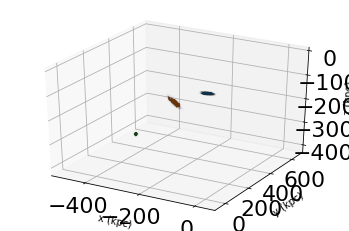

In [25]:
def 3DPlot():
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.bar3d(xD_new,yD_new,zD_new,dx=0.01,dy=0.01,dz=0.01)
    ax.bar3d(xD1_new,yD1_new,zD1_new,dx=0.01,dy=0.01,dz=0.01)
    ax.bar3d(xD2_new,yD2_new,zD2_new,dx=0.01,dy=0.01,dz=0.01)
    ax.set_xlabel("x (kpc)")
    ax.set_ylabel("y (kpc)")
    ax.set_zlabel("z (kpc)")
    plt.show()

# Function to compute phase diagram (velocity vs. radius)
Copied from Lab 7

In [ ]:
def PhaseDiagram():
    # Make a phase diagram
    # MW Disk Velocity Field edge on.

    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(111)

    # Plot 2D Histogram one component of  Pos vs Vel 
    # ADD HERE
    plt.hist2d(rnew[:,0],vnew[:,1],bins=150,norm=LogNorm())

    # Overplot Circular Velocity from the MassProfile Code
    # ADD HERE

    plt.plot(R,Vcirc,color='red')
    plt.plot(-R,-Vcirc,color='red')


    # Add axis labels
    plt.xlabel('x (kpc)', fontsize=22)
    plt.ylabel('vy (km/s)', fontsize=22)

    #adjust tick label font size
    label_size = 22
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size